In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


We have our database in a csv format, the file has a size of 1.7Gb, which is big but still manageable. So we decide to use pandas to exploit it.

We couldn't explore the file in excel, and when we open it directly we get multiple errors.
So we imported the csv library of python just to get a first glimpse at the data.

In [2]:
import csv
with open(r'en.openfoodfacts.org.products.csv', 'rt') as f:
    reader = csv.reader(f)
    linenumber = 1
    try:
        print(next(reader))
    except Exception as e:
        print (("Error line %d: %s %s" % (linenumber, str(type(e)), e.message)))

['code\turl\tcreator\tcreated_t\tcreated_datetime\tlast_modified_t\tlast_modified_datetime\tproduct_name\tgeneric_name\tquantity\tpackaging\tpackaging_tags\tbrands\tbrands_tags\tcategories\tcategories_tags\tcategories_en\torigins\torigins_tags\tmanufacturing_places\tmanufacturing_places_tags\tlabels\tlabels_tags\tlabels_en\temb_codes\temb_codes_tags\tfirst_packaging_code_geo\tcities\tcities_tags\tpurchase_places\tstores\tcountries\tcountries_tags\tcountries_en\tingredients_text\tallergens\tallergens_en\ttraces\ttraces_tags\ttraces_en\tserving_size\tserving_quantity\tno_nutriments\tadditives_n\tadditives\tadditives_tags\tadditives_en\tingredients_from_palm_oil_n\tingredients_from_palm_oil\tingredients_from_palm_oil_tags\tingredients_that_may_be_from_palm_oil_n\tingredients_that_may_be_from_palm_oil\tingredients_that_may_be_from_palm_oil_tags\tnutrition_grade_uk\tnutrition_grade_fr\tpnns_groups_1\tpnns_groups_2\tstates\tstates_tags\tstates_en\tmain_category\tmain_category_en\timage_url\t

By getting the first line of the file, we notice that it is delimiter is "\t". So we can now open it with pandas without any problem

In [3]:
df=pd.read_csv('en.openfoodfacts.org.products.csv',sep="\t")

C:\Users\Fatine\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(695207, 173)

The dataframe has a shape of (695207, 173) and many Nan values. We try dropping them but got an empty dataframe. So all the rows have Nan values in them.

In [5]:
df.dropna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g


We look at the number of nan values in each column and plot their distribution:

In [6]:
nan_values=df.isnull().sum(axis=0).sort_values()

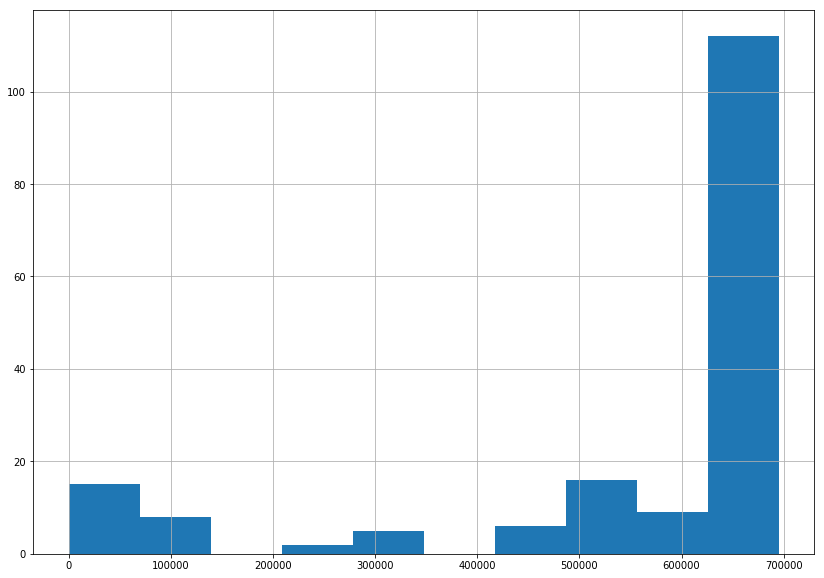

In [7]:
plt.figure(figsize=(14,10))
nan_values.hist()
plt.show()

So over than 100 columns have more than 600 000 Nan values on around 700 000 entries. We can understand from this that these columns may not be very pertinent.

In [9]:
list(nan_values[nan_values>600000].index.values)

['image_url',
 'image_small_url',
 'stores',
 'generic_name',
 'allergens',
 'manufacturing_places',
 'manufacturing_places_tags',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'traces_en',
 'traces_tags',
 'image_nutrition_small_url',
 'image_nutrition_url',
 'traces',
 'emb_codes',
 'emb_codes_tags',
 'origins',
 'origins_tags',
 'cities_tags',
 'first_packaging_code_geo',
 'potassium_100g',
 'polyunsaturated-fat_100g',
 'monounsaturated-fat_100g',
 'ingredients_that_may_be_from_palm_oil_tags',
 'vitamin-pp_100g',
 'ingredients_from_palm_oil_tags',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'alcohol_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'vitamin-d_100g',
 'vitamin-b6_100g',
 'magnesium_100g',
 'phosphorus_100g',
 'vitamin-b12_100g',
 'vitamin-b9_100g',
 'zinc_100g',
 'cocoa_100g',
 'fruits-vegetables-nuts_100g',
 'folates_100g',
 'pantothenic-acid_100g',
 'copper_100g',
 'vitamin-e_100g',
 'manganese_100g',
 'selenium_100g',
 'omega-3-fat_100g',
 'vitamin-k_100g

In [10]:
useless_features=list(nan_values[nan_values>600000].index.values)
df.drop(useless_features,axis=1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,7.8,1.400,0.551181,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,0.2,2.040,0.803150,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,0.9,0.420,0.165354,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1520506371,2018-03-08T10:52:51Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,4.4,0.250,0.098425,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000001001,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537766416,2018-09-24T05:20:16Z,1537766416,2018-09-24T05:20:16Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000001007,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1538127563,2018-09-28T09:39:23Z,1538127565,2018-09-28T09:39:25Z,Vainilla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['nutrition_grade_fr']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13          d
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19          a
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
695177    NaN
695178    NaN
695179      d
695180    NaN
695181    NaN
695182    NaN
695183    NaN
695184      a
695185    NaN
695186    NaN
695187    NaN
695188    NaN
695189    NaN
695190    NaN
695191      d
695192    NaN
695193    NaN
695194    NaN
695195    NaN
695196    NaN
695197      e
695198    NaN
695199    NaN
695200    NaN
695201    NaN
695202    NaN
695203    NaN
695204    NaN
695205    NaN
695206    NaN
Name: nutrition_grade_fr, Length: 695207, dtype: object

In [12]:
df['nutrition-score-fr_100g'].dropna()

13        14.0
19        -4.0
48        -4.0
50        15.0
249       29.0
255        0.0
256        1.0
258        6.0
278        9.0
289        1.0
293       12.0
298       16.0
300        2.0
302        1.0
303       14.0
308        2.0
318       15.0
328       18.0
352        0.0
358       15.0
368        3.0
388       26.0
408        1.0
410       11.0
411       10.0
413        3.0
414       13.0
425       36.0
426       13.0
434       14.0
          ... 
694897     2.0
694900    17.0
694901     6.0
694912    13.0
694913     3.0
694916    27.0
694918    12.0
694925     1.0
694937    18.0
694949    26.0
694964    12.0
694968    14.0
694981    22.0
694983     3.0
695000    20.0
695020    12.0
695021     9.0
695036    15.0
695043    -3.0
695046     4.0
695063    13.0
695083    16.0
695092     6.0
695094     0.0
695098    12.0
695100     7.0
695179    14.0
695184    -3.0
695191    15.0
695197    22.0
Name: nutrition-score-fr_100g, Length: 140512, dtype: float64

In [16]:
nan_values['nutrition_grade_fr']

554695

In [17]:
nutr_null=df[df['nutrition_grade_fr'].isnull()]
nutr_null=nutr_null.drop(nutr_null[nutr_null['countries'].str.contains("france",na=False)].index)
nutr_null=nutr_null.drop(nutr_null[nutr_null['countries'].str.contains("FR",na=False)].index)

In [18]:
nan_rows=df.isnull().sum(axis=1).sort_values()

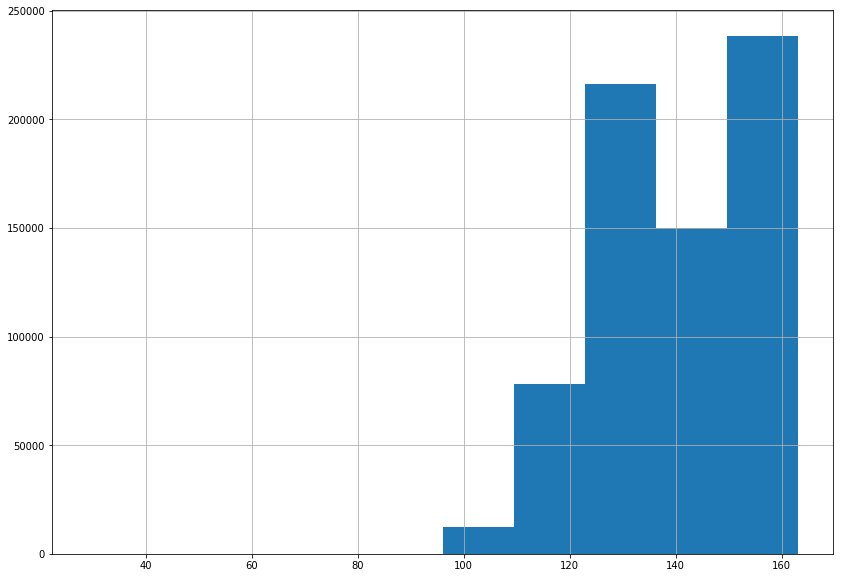

In [19]:
plt.figure(figsize=(14,10))
nan_rows.hist()
plt.show()

In [20]:
nan_rows[nan_rows<100]

208171    29
268824    79
604772    81
604708    81
268411    82
268300    83
605862    83
353385    83
380801    84
353339    84
268416    85
477927    85
268600    85
268603    85
437679    85
353485    85
286905    85
303286    86
392150    86
303330    86
353378    86
38981     86
268417    86
164469    87
303298    87
268413    87
477921    87
387280    87
514955    87
413920    87
          ..
664624    99
606079    99
402860    99
606077    99
75838     99
595374    99
376950    99
647576    99
420480    99
345447    99
419365    99
310031    99
517957    99
286768    99
345442    99
311031    99
14478     99
285993    99
419728    99
148788    99
72109     99
315223    99
39076     99
595679    99
331207    99
518292    99
14659     99
594849    99
59512     99
418572    99
Length: 275, dtype: int64

There are only 275 on 695 207 rows that have less than 100 nan values in their columns!

In [21]:
nan_values.groupby(by=nan_values).count()

0          2
3          1
4          1
10         1
34         2
68         3
598        3
18038      1
26019      1
102142     1
103573     1
107543     1
107800     1
118166     1
123319     1
123355     1
133429     1
231167     1
231200     1
301487     1
301521     3
301534     1
421427     1
432576     1
438507     1
455051     1
483529     1
483562     1
501335     1
515930     1
          ..
695040     1
695072     1
695093     2
695101     1
695128     1
695143     1
695148     1
695161     1
695165     1
695167     1
695169     1
695170     1
695172     3
695173     1
695174     2
695175     1
695179     1
695180     1
695181     1
695186     1
695188     1
695193     2
695194     2
695196     1
695198     1
695200     1
695204     2
695205     7
695206    10
695207     4
Length: 132, dtype: int64

We can clean the dataset by removing the columns that have very high values of NaN.

In [8]:
#we remove the features that have very high number of nan values, but keep some of them that are relevant even if they have 
#also high numbers of nan values
features_to_remove=list(nan_values[nan_values>600000].index.values)
features_to_keep=['ingredients_from_palm_oil_tags','allergens','ingredients_that_may_be_from_palm_oil_tags','traces_tags','emb_codes_tags','origins_tags','cities_tags']
features_to_remove=[item for item in features_to_remove if item not in features_to_keep]
features_to_remove.extend(['code','url','creator','product_name','packaging','serving_size','nutrition-score-fr_100g',
                          'nutrition-score-uk_100g','created_t','created_datetime','last_modified_t',
                           'last_modified_datetime'])

#when some columns are tags, we remove the redundant column that's not called tags
for col in df.columns.values:
    if 'tags' in col:
        print(df[col].dropna().apply(lambda x: x.split(",")))
        features_to_remove.append(col.replace('_tags',''))
    if '_en' in col:
        features_to_remove.append(col)
features_to_remove=set(list(features_to_remove))

13                                  [barquette, plastique]
109                                     [bocal, plastique]
112                                            [plastique]
255                                    [carton, plastique]
256                                    [plastique, carton]
258                                                [frais]
268                                                [frais]
273                                  [paper, plastic-film]
278                                                [frais]
289                                     [frais, plastique]
291                                     [sachet-plastique]
293                                       [canette, metal]
296                                        [carton, boite]
300                                                 [frai]
301                                                [frais]
302                                    [sachet, plastique]
303                                               [carto

109                                                [france]
255                                                [france]
258                                       [brossard-quebec]
268                                       [brossard-quebec]
273                                        [united-kingdom]
278                                       [brossard-quebec]
289                                      [brossard, quebec]
293                                            [etats-unis]
296                                     [france, avranches]
300                                      [brossard, quebec]
301                                       [brossard-quebec]
303                                            [etats-unis]
309                                                [france]
352                                      [brossars, quebec]
354                                              [thailand]
361                                                [france]
388                                     

0                [en:france]
1                [en:france]
2                [en:france]
3              [en:slovakia]
4              [en:slovakia]
5                [en:france]
6                [en:france]
7                [en:france]
8                [en:france]
9                [en:france]
10               [en:france]
11               [en:france]
12               [en:france]
13               [en:france]
14               [en:france]
15               [en:france]
16               [en:france]
17               [en:france]
18               [en:france]
19               [en:france]
20               [en:france]
21               [en:france]
22               [en:france]
23               [en:france]
24               [en:france]
25               [en:france]
26               [en:france]
27               [en:france]
28               [en:france]
29               [en:france]
                 ...        
695177         [en:pakistan]
695178           [en:france]
695179           [en:france]
695180        

0         [en:to-be-completed, en:nutrition-facts-comple...
1         [en:to-be-completed, en:nutrition-facts-to-be-...
2         [en:to-be-completed, en:nutrition-facts-comple...
3         [en:empty, en:to-be-completed, en:nutrition-fa...
4         [en:empty, en:to-be-completed, en:nutrition-fa...
5         [en:to-be-completed, en:nutrition-facts-to-be-...
6         [en:to-be-completed, en:nutrition-facts-comple...
7         [en:to-be-completed, en:nutrition-facts-comple...
8         [en:to-be-completed, en:nutrition-facts-to-be-...
9         [en:to-be-completed, en:nutrition-facts-to-be-...
10        [en:to-be-completed, en:nutrition-facts-comple...
11        [en:to-be-completed, en:nutrition-facts-comple...
12        [en:to-be-completed, en:nutrition-facts-comple...
13        [en:to-be-completed, en:nutrition-facts-comple...
14        [en:to-be-completed, en:nutrition-facts-comple...
15        [en:to-be-completed, en:nutrition-facts-comple...
16        [en:to-be-completed, en:nutrit

In [9]:
cleaned_df=df.drop(features_to_remove,axis=1)
#pd.get_dummies(cleaned_df)
cleaned_df

,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,labels_tags,emb_codes_tags,cities_tags,purchase_places,countries_tags,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,70.1,15.0,NaN,7.8,1.400,0.551181,NaN,NaN,NaN,NaN
1,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,4.8,0.4,NaN,0.2,2.040,0.803150,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,5.3,3.9,NaN,0.9,0.420,0.165354,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,16.3,16.3,NaN,4.4,0.250,0.098425,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[~df.index.isin(df.dropna(subset=['generic_name']).index)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1520506371,2018-03-08T10:52:51Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000001001,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537766416,2018-09-24T05:20:16Z,1537766416,2018-09-24T05:20:16Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000001007,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1538127563,2018-09-28T09:39:23Z,1538127565,2018-09-28T09:39:25Z,Vainilla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#This function separates the data on one column, regarding whether it contains nan (test) or not (train)
def split_data_on_nan(dataframe,column):
    train = dataframe.dropna(subset=[column])
    test = dataframe.drop(train.index)
    return train,test

In [28]:
tr,te=split_data_on_nan(df,'nutrition_grade_fr')

In [29]:
trX=tr.drop('nutrition_grade_fr',axis=1)
trY=tr['nutrition_grade_fr']

In [ ]:
#cleaned_df['packaging_tags']=cleaned_df['packaging_tags'].dropna().apply(lambda x: x.split(","))
#pd.get_dummies(cleaned_df['packaging_tags'])

test=cleaned_df['packaging_tags'].dropna().str.get_dummies(sep=",")

In [ ]:
#this function splits the entries that contain tags
def f(x):
    return x.split(",")

all_tags=[]
for x in cleaned_df['countries_tags'].dropna().unique():
    all_tags.extend(f(x))
set(all_tags)

KeyboardInterrupt: 

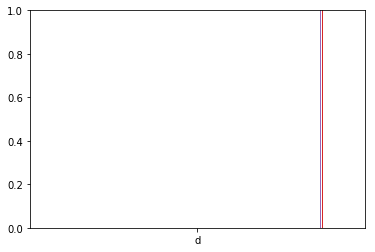

In [13]:
df['nutrition_grade_fr'].dropna().hist()